In [1]:
import argparse
import voc12.dataloader
import numpy as np
from tqdm import tqdm
from os import path
from glob import glob

In [2]:
# for image_filename in tqdm(glob("./VOCdevkit/VOC2012/JPEGImages/*.jpg")):
#     dirname, basename = path.split(image_filename)
#     basename, _ = path.splitext(basename)
#     voc12.dataloader.save_divided_image_and_label_from_xml(basename, 64, "./VOCdevkit/VOC2012/")

100%|██████████| 17125/17125 [09:09<00:00, 31.17it/s]


In [5]:
g = glob("/home/postech2/irn/VOCdevkit/VOC2012/Divided/*_label.npy")
labelfile_sample = g[0]
arr_sample = np.load(labelfile_sample)
number_of_all_classes = arr_sample.shape[0]
number_of_all_patches = len(g)
print(number_of_all_classes, number_of_all_patches)

20 597908


In [6]:
number_of_classes_arr = np.zeros_like(arr_sample)
number_of_patches_per_class=list()
for labelfile in tqdm(g):
    arr = np.load(labelfile)
    number_of_classes_arr += arr
    number_of_patches_per_class.append(np.count_nonzero(arr))

100%|██████████| 597908/597908 [11:17<00:00, 882.26it/s]  


In [3]:
arr

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [10]:
print(number_of_classes_arr)
print(number_of_patches_per_class[412:417])
print(len(number_of_patches_per_class))

[ 14951.  10717.  14013.   8758.   6434.  10637.  18257.  28509.  18392.
   6771.   9918.  29058.  11637.  12325. 168985.   7281.   6848.  14746.
  12940.   7616.]
[0, 0, 1, 0, 1]
597908


In [11]:
print("avg. number of patches per class", np.mean(number_of_classes_arr))
print("std. number of patches per class", np.std(number_of_classes_arr))
print("-------")
print("avg. number of classes per patch", np.mean(number_of_patches_per_class))
print("std. number of classes per patch", np.std(number_of_patches_per_class))

avg. number of patches per class 20939.65
std. number of patches per class 34536.645
-------
avg. number of classes per patch 0.7004305010135339
std. number of classes per patch 0.6167649524071472


In [83]:
import cityscapes.dataloader
from torch.utils.data import DataLoader
import torch

train_dataset = cityscapes.dataloader.CityScapesDividedDataset(
    cityscapes.dataloader.Divide.Train,
    int(64),
    None
)
print(len(train_dataset))

train_data_loader = DataLoader(train_dataset, batch_size=1024,
                                shuffle=False, num_workers=8, pin_memory=True, drop_last=True)


1523200


In [20]:
number_of_classes_arr_cityscapes = torch.zeros((20,))
numbers_of_classes_per_patch_cityscapes = list()
for (_, hot_label, _) in tqdm(train_data_loader, desc="test"):
    number_of_classes_arr_cityscapes += torch.sum(hot_label, dim=0)
    numbers_of_classes_per_patch_cityscapes.extend(torch.sum(hot_label, dim=1).tolist())

test: 100%|██████████| 1487/1487 [00:58<00:00, 25.32it/s]


In [22]:
print(number_of_classes_arr_cityscapes)
print("avg. number of patches per class", torch.mean(number_of_classes_arr_cityscapes))
print("std. number of patches per class", torch.std(number_of_classes_arr_cityscapes))
print("-------")
print("avg. number of classes per patch", np.mean(numbers_of_classes_per_patch_cityscapes))
print("std. number of classes per patch", np.std(numbers_of_classes_per_patch_cityscapes))

tensor([629890., 166714., 453618.,  20769.,  27938., 131112.,  18873.,  37746.,
        330131.,  40065.,  91356.,  52311.,   7714., 160842.,   6154.,   5460.,
          4847.,   4120.,  19499., 477730.])
avg. number of patches per class tensor(134344.4531)
std. number of patches per class tensor(187203.3594)
-------
avg. number of classes per patch 1.76456962949731
std. number of classes per patch 1.024089841697445


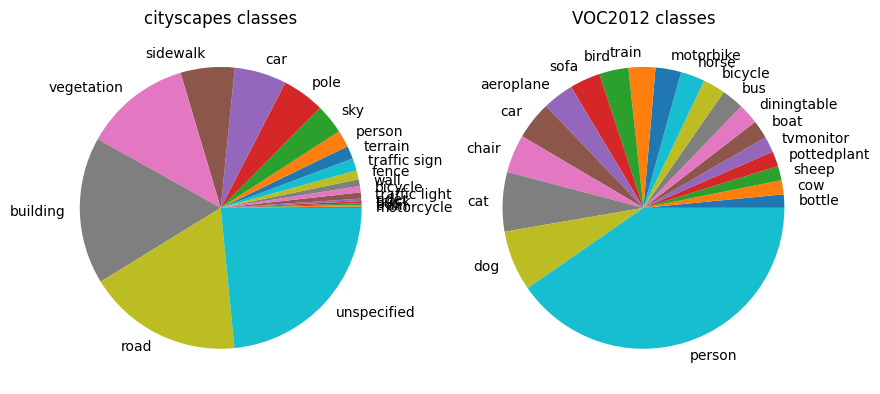

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from cityscapesscripts.helpers import labels
from voc12.dataloader import CAT_LIST
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 20))
number_of_classes_arr_cityscapes = torch.Tensor([629890., 166714., 453618.,  20769.,  27938., 131112.,  18873.,  37746.,
        330131.,  40065.,  91356.,  52311.,   7714., 160842.,   6154.,   5460.,
          4847.,   4120.,  19499., 477730.])
ax0.pie(np.sort(number_of_classes_arr_cityscapes.numpy()), labels=[labels.trainId2label[p].name for p in np.argsort(number_of_classes_arr_cityscapes.numpy()) if p < 19] + ["unspecified"])
ax0.set_title("cityscapes classes")
ax1.pie(np.sort(number_of_classes_arr), labels=[CAT_LIST[p] for p in np.argsort(number_of_classes_arr)])
ax1.set_title("VOC2012 classes")
plt.show()

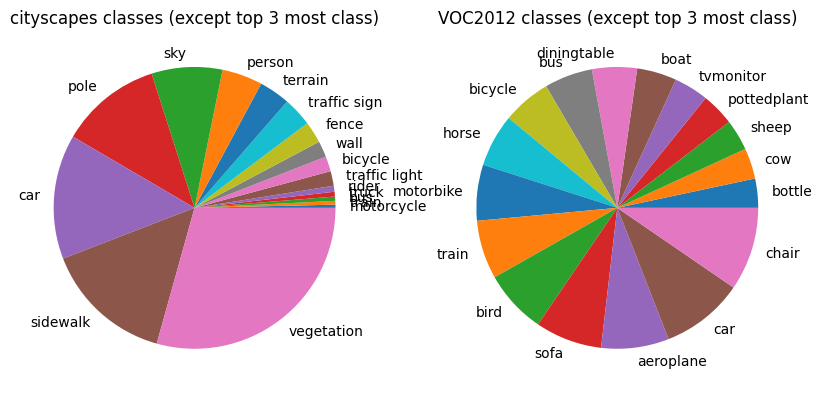

In [82]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 20))
number_of_classes_arr_cityscapes = torch.Tensor([629890., 166714., 453618.,  20769.,  27938., 131112.,  18873.,  37746.,
        330131.,  40065.,  91356.,  52311.,   7714., 160842.,   6154.,   5460.,
          4847.,   4120.,  19499., 477730.])
ax0.pie(np.sort(number_of_classes_arr_cityscapes.numpy())[:-3], labels=([labels.trainId2label[p].name for p in np.argsort(number_of_classes_arr_cityscapes.numpy()) if p < 19] + ["unspecified"])[:-3])
ax0.set_title("cityscapes classes (except top 3 most class)")
ax1.pie(np.sort(number_of_classes_arr)[:-3], labels=[CAT_LIST[p] for p in np.argsort(number_of_classes_arr)][:-3])
ax1.set_title("VOC2012 classes (except top 3 most class)")
plt.title
plt.show()